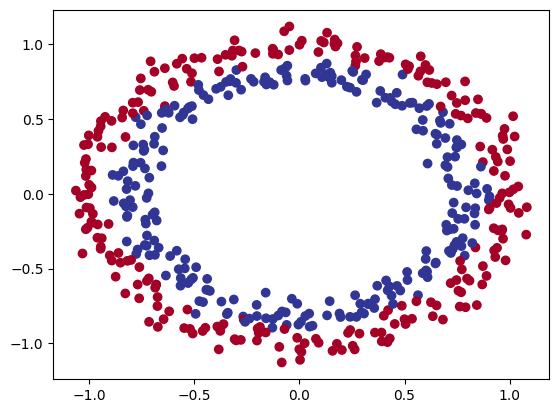

In [ ]:
import sklearn
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from torch import nn

number_c = 500

X , y = make_circles(number_c, random_state = 1998, noise = 0.05)


circles = pd.DataFrame({'X1' : X[:, 0],
                       'X2': X[:, 1],
                        'labels' : y})


plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap = plt.cm.RdYlBu);

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]


(tensor([[-0.6557,  0.1858],
         [ 0.1666,  1.0045],
         [ 0.6255, -0.7246],
         [ 0.3916, -0.9862],
         [ 0.2630, -1.0403]]),
 tensor([1., 0., 0., 0., 0.]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1998) # spliting my data. 80 % train and 20 % test set


In [ ]:
# agnostic code to check the device

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
from sklearn import datasets
#constract model : 
class CircleModelN0(nn.Module): 
  def __init__(self):
    super().__init__()

    self.layer_one = nn.Linear(in_features = 2, out_features = 5)
    self.layer_two = nn.Linear(in_features = 5, out_features = 1)

  def forward(self, x):
    return self.layer_two(self.layer_one(x))

model_one = CircleModelN0().to(device)
#applying the class model with Sequental but this is only for the simple algrithima not for the big ones.
# model_one_copy = nn.Sequential(
#     nn.Linear(in_features =2, out_features = 5),
#     nn.Linear(in_features = 5, out_features = 1)
# ).to(device)

In [ ]:
model_one.state_dict()

OrderedDict([('layer_one.weight',
              tensor([[-0.0891,  0.5954],
                      [ 0.3646, -0.0280],
                      [ 0.4233,  0.3297],
                      [ 0.0329,  0.1902],
                      [ 0.6333,  0.4274]])),
             ('layer_one.bias',
              tensor([-0.1214,  0.2885, -0.1740, -0.3159, -0.1937])),
             ('layer_two.weight',
              tensor([[-0.1438, -0.0513, -0.1296,  0.1489, -0.0669]])),
             ('layer_two.bias', tensor([0.1697]))])

In [ ]:
# check Loss function -> show how much my model is wrong 
loss_check = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_one.parameters(), lr= 0.1)
# optimizer function is decreasing the value which loss function goes down

In [ ]:
def accurancy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().iten()
  acc = (correct/len(y_pred)) * 100
  return acc

In [ ]:
model_one.eval()
with torch.inference_mode():
  y_logits = model_one(X_test.to(device))[:5]
y_logits


tensor([[0.2741],
        [0.0319],
        [0.2320],
        [0.2814],
        [0.0541]])

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs # to check my model logits premodel : prediction probabilities

tensor([[0.5681],
        [0.5080],
        [0.5577],
        [0.5699],
        [0.5135]])

In [ ]:
# find predicted values :

y_preds = torch.round(y_pred_probs)

y_pred_lebels = torch.round(torch.sigmoid(model_one(X_test.to(device))[:5]))

#check equality 
print(torch.eq(y_preds.squeeze(), y_pred_lebels.squeeze()))

#get rid of extra dimensions
y_preds.squeeze()

tensor([True, True, True, True, True])


In [ ]:
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# epochs = 100

# # put data to target device
# X_train, y_train = X_train.to(device), y_train.to(device)
# X_test, y_test = X_test.to(device), y_test.to(device)

# #put training and evaulating loop.

# for epoch in range(epochs):
#   model_one.train() # train my model

#   #forward the pass
#   y_logits = model_one(X_train).squeeze()
#   y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits to pred probs and to prediction labels

#   # calclating my loss value

#   loss = loss_fn(y_logits, y_train) # nn.BCE loss

#   acc = accuracy_fn(y_true = y_train,
#                     y_pred=y_pred)